In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [158]:
titanic_train = pd.read_csv("data/train.csv")
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [159]:
print(titanic_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [160]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [162]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling with the missing values

In [163]:
# There are so much missing values in "Cabin" column.It would be hard to fill so we should drop it.
titanic_train = titanic_train.drop("Cabin",axis=1)

In [164]:
# Replace the missing values in "Age" column with the mean.
titanic_train['Age'].fillna(titanic_train['Age'].mean() , inplace=True)

In [165]:
# Replace the missing values in "Embarked" column with the mode.
titanic_train["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [166]:
titanic_train['Embarked'].fillna(titanic_train["Embarked"].mode()[0] , inplace= True)

In [167]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [168]:
titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [169]:
titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [170]:
titanic_train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [171]:
titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Data visualization

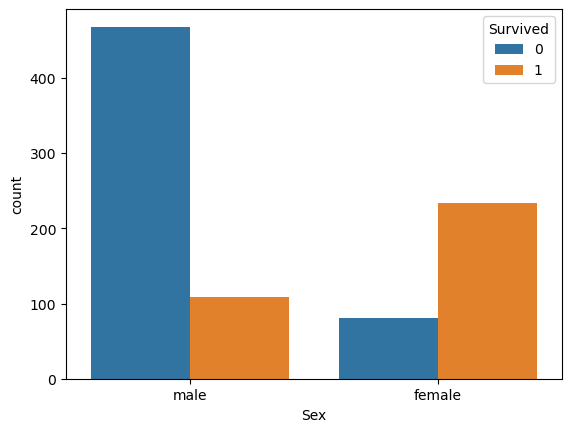

Percentage of females who survived = 74.20382165605095 %
Percentage of males who survived = 18.890814558058924 %


In [172]:
sns.countplot(x = "Sex" ,hue="Survived",data = titanic_train)
plt.show()

print("Percentage of females who survived =", titanic_train["Survived"][titanic_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100,"%")
print("Percentage of males who survived =", titanic_train["Survived"][titanic_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100,"%")

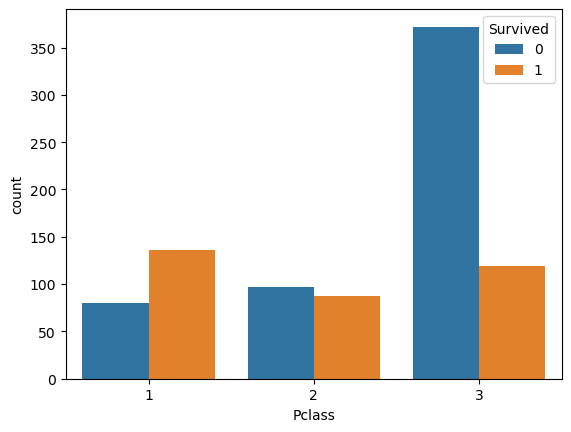

Percentage of Pclass = 1 who survived = 62.96296296296296 %
Percentage of Pclass = 2 who survived = 47.28260869565217 %
Percentage of Pclass = 3 who survived = 24.236252545824847 %


In [173]:
sns.countplot(x = "Pclass", hue="Survived", data=titanic_train)
plt.show()

print("Percentage of Pclass = 1 who survived =" ,titanic_train['Survived'][titanic_train['Pclass'] == 1].value_counts(normalize=True)[1]*100,"%")
print("Percentage of Pclass = 2 who survived =" ,titanic_train['Survived'][titanic_train['Pclass'] == 2].value_counts(normalize=True)[1]*100,"%")
print("Percentage of Pclass = 3 who survived =" ,titanic_train['Survived'][titanic_train['Pclass'] == 3].value_counts(normalize=True)[1]*100,"%")

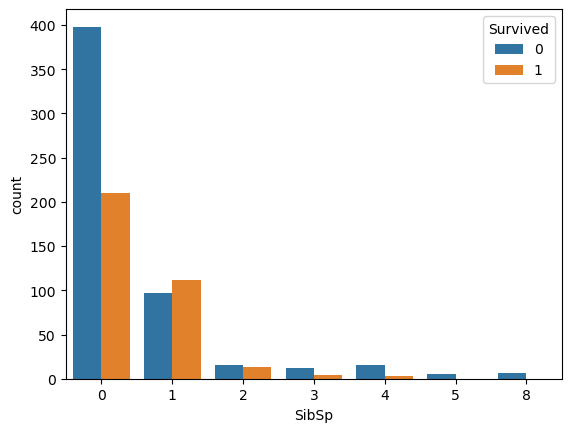

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


In [174]:
sns.countplot(x = "SibSp", hue="Survived", data=titanic_train)
plt.show()

print("Percentage of SibSp = 0 who survived:", titanic_train["Survived"][titanic_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", titanic_train["Survived"][titanic_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", titanic_train["Survived"][titanic_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)


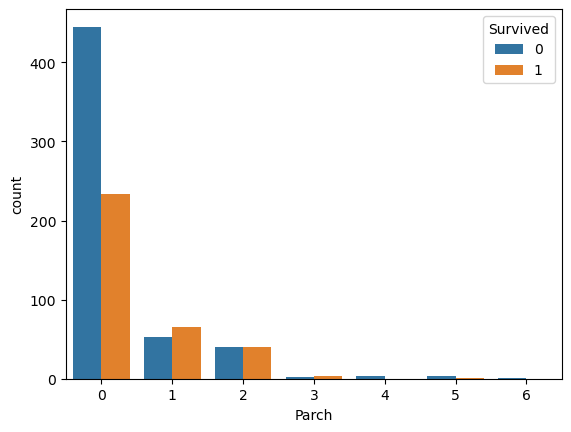

In [175]:
sns.countplot(x= "Parch", hue="Survived" , data= titanic_train)
plt.show()

### Encoding the categorical columns

In [176]:
titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [177]:
titanic_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [178]:
titanic_train.replace({"Sex" : {"male" : 0 , "female" : 1}, "Embarked" : {"S" : 0 , "C" : 1 ,"Q" : 2}},inplace=True)

In [179]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


### Seperating features and target

In [180]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [181]:
from sklearn.model_selection import train_test_split

X = titanic_train.drop(columns=["PassengerId", "Survived", "Name" , "Ticket"] , axis=1)
y = titanic_train['Survived']

X_train , X_test ,y_train , y_test = train_test_split(X,
                                                     y,
                                                     test_size=0.2,
                                                     random_state=1,
                                                     stratify=y)


In [182]:
print(X.shape , X_train.shape , X_test.shape)

(891, 7) (712, 7) (179, 7)


#### Choosing the best model

- Logistic Regression
- Random Forest Classifier
- Gaussian Naive Bayes
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Linear SVC
- Decision Tree Classifier
- Gradient Boosting Classifier
- Stochastic Gradient Descent
- Perceptron

In [183]:
# Logistic regression

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
lg_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", lg_accuracy)


Accuracy score of test data :  78.77


In [184]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", rfc_accuracy)

Accuracy score of test data :  82.12


In [185]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
gaussian_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", gaussian_accuracy)

Accuracy score of test data :  82.12


In [186]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", knn_accuracy)

Accuracy score of test data :  69.83


In [187]:
# Support Vector Machines

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
svc_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", svc_accuracy)

Accuracy score of test data :  67.04


In [188]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
linear_svc_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", linear_svc_accuracy)

Accuracy score of test data :  80.45


In [189]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
dtc_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", dtc_accuracy)

Accuracy score of test data :  79.89


In [190]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
gbc_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", gbc_accuracy)

Accuracy score of test data :  82.68


In [191]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", sgd_accuracy)

Accuracy score of test data :  75.42


In [192]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
perceptron_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy score of test data : ", perceptron_accuracy)

Accuracy score of test data :  71.51


In [193]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [svc_accuracy, knn_accuracy, lg_accuracy, rfc_accuracy, gaussian_accuracy, perceptron_accuracy,linear_svc_accuracy, dtc_accuracy,
              sgd_accuracy, gbc_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,82.68
3,Random Forest,82.12
4,Naive Bayes,82.12
6,Linear SVC,80.45
7,Decision Tree,79.89
2,Logistic Regression,78.77
8,Stochastic Gradient Descent,75.42
5,Perceptron,71.51
1,KNN,69.83
0,Support Vector Machines,67.04


##### Since Gradient Boosting Classifier gives the best score , it is best to use.

## Test Data

In [196]:
titanic_test = pd.read_csv("data/test.csv")
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [199]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [200]:
ids = titanic_test['PassengerId']

In [201]:
titanic_train["Embarked"].

0    0
Name: Embarked, dtype: int64

In [202]:
titanic_test['Age'].fillna(titanic_train['Age'].mean(), inplace=True)
titanic_test['Fare'].fillna(titanic_train['Fare'], inplace=True)
titanic_test['Embarked'].fillna(titanic_train["Embarked"].mode()[0] , inplace= True)
titanic_test.replace({"Sex": {"male": 0, "female": 1}, 
                      "Embarked": {"S": 0, "C": 1, "Q": 2}}, inplace=True)

In [203]:
X_test_final = titanic_test.drop(columns=["Cabin", "PassengerId", "Name", "Ticket"], axis=1)

In [204]:
X_test_final.shape

(418, 7)

In [205]:
final_predictions = gbc.predict(X_test_final)

In [207]:
submission = pd.DataFrame({
    "PassengerId": ids,
    "Survived": final_predictions
})

In [208]:
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [209]:
submission.to_csv('titanic_submission.csv', index=False)